# House price changing tendency and possible factors in Beijing 
## by Xiaoxuan Yang
In china, the real estate market is hot these years. People try every method to buy a house or apartment hoping because of the raising of the price. Some earn a lot by selling additional apartments. The report will explore the price changing tendency with the influence of different factors including floor, square range, distance to subway,etc. The dataset can be found on github(https://raw.githubusercontent.com/Steve0525/Steve0525.github.io/master/house_price_new.csv)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bqplot
import seaborn as sns 
import ipywidgets 
%matplotlib inline 

In [4]:
URL = 'https://raw.githubusercontent.com/Steve0525/Steve0525.github.io/master/house_price_new.csv'
house_price = pd.read_csv(URL, ',',encoding = 'unicode_escape', low_memory=False)

The interactive plto below is used to check the influence on price from price. The x and y are the two area can be chosen to see the changes on the plot. Different year will always be plot in the same color, from dark to bright, representing 2011 to 2017. This plot can be used to do a quick exploration on what influence the factors may bring to final trade price of each house/apartment. 

interactive(children=(Dropdown(description='x', options=('Year', 'Lng', 'square', 'livingRoom', 'drawingRoom',…

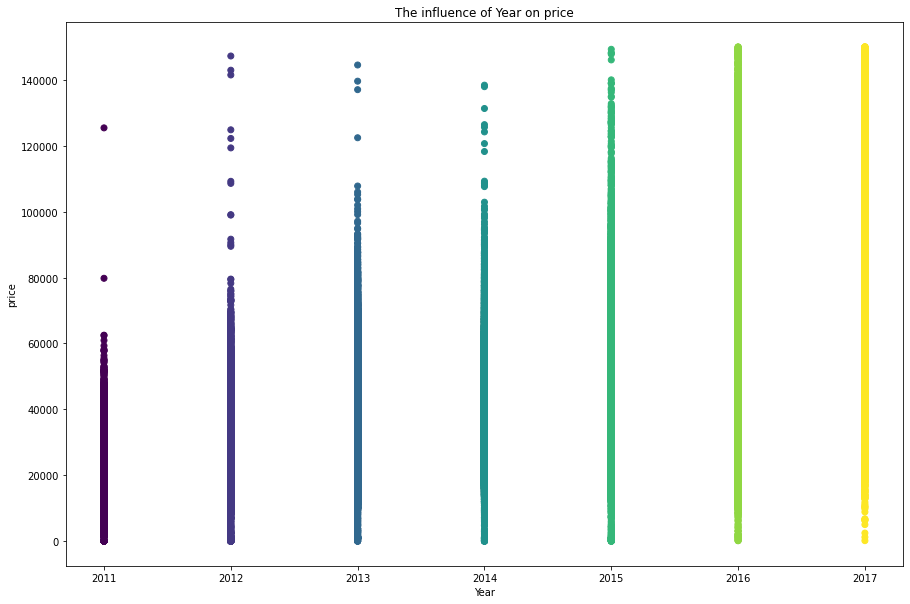

In [5]:
# a quick plot of each columns vs price 
@ipywidgets.interact(x = ['Year','Lng', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType', \
                          'constructionTime', 'renovationCondition', 'ladderRatio', 'elevator', 'subway', 'district'],
                     y = [ 'price','Lat'])

def plot(x,y): 
    x_column = house_price[x]
    y_column = house_price[y]
    fig,ax = plt.subplots(figsize=(15,10))
    ax = plt.scatter(x_column,y_column, c=house_price['Year'])
    plt.xlabel(x)
    plt.ylabel(y)
    if x == 'Lng' and y == 'Lat':
        plt.title('House location map')
    else:
        plt.title('The influence of {} on {}'.format(x,y))
    plt.show()

plot('Year', 'price')

 The plot above shows the house price at different time in Beijing. It can be told that the upper boundary of the hosue price is keep going up, from around ￥60,000 to more than ￥140,000 for each apartment/house, 2 times increase in 6 years. 

As median can better represents the chagnes of the prices, and the above chart has no aggreagation information. Here a box plot is provided for a direct exploration.

In [4]:
# set parameter for seaborn 
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rc('figure', figsize=(10, 10))
plt.rcParams['axes.unicode_minus']=False
sns.set(font_scale=2)

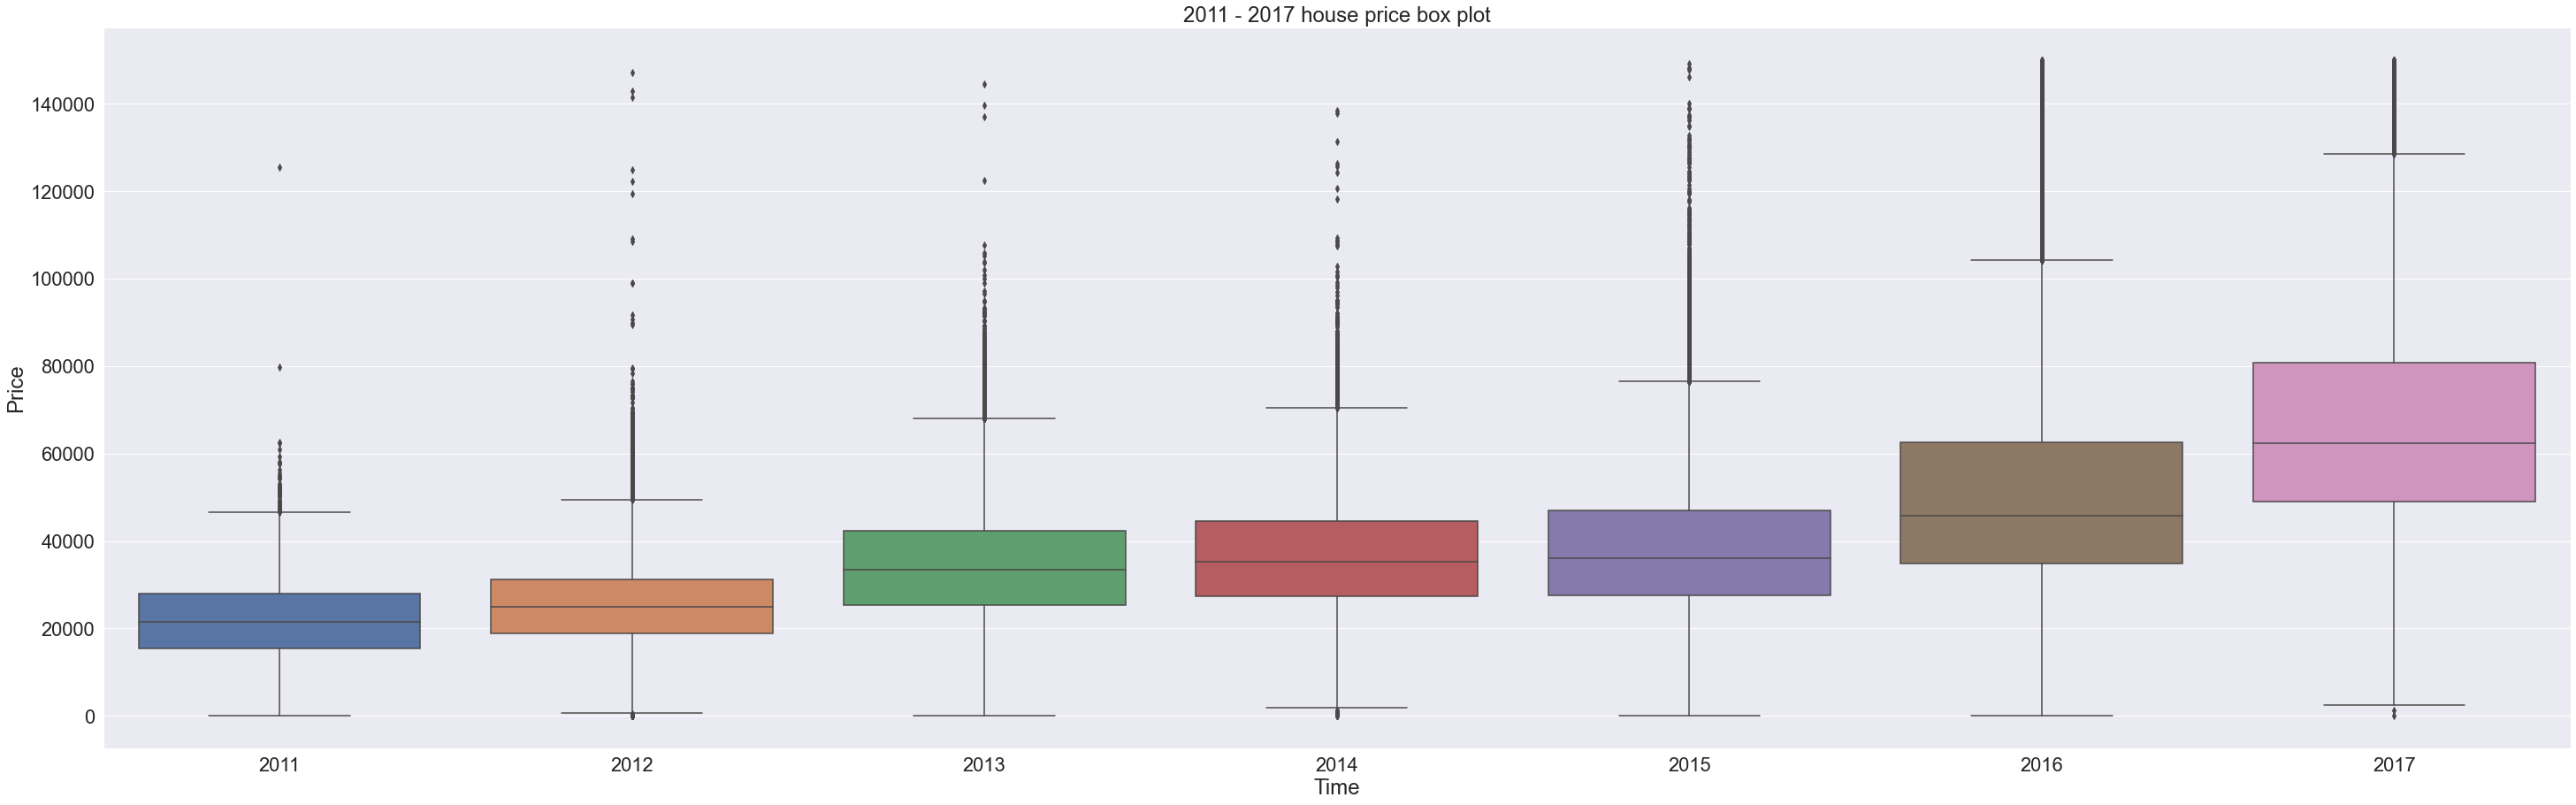

In [5]:
f, ax = plt.subplots(figsize=(50, 15))
sns.boxplot(y="price", x='Year', data=house_price)
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('2011 - 2017 house price box plot')

From the box plot, the box represent the house price that are in the range of 25% and 75% level in all the data. The balck points are the outliers, which means the really high price. Two things to be attention from the plot, one is that the median is nearly tripled. And the other thing is that the box becomes larger, which means the price of houses varies from place to place. 

To some extent, the house price raising is a nation wide tendency. So I found another resource having house price increasing tendency of ShangHai city(https://www.globalpropertyguide.com/home-price-trends/China). As a comparision, it can be told that the house price in Shanhai is also going up from 2011 to 2017. The average price goes up from ￥3000  to ￥4500 which is also a nearly two times increase.  

![Shanghai house price ](https://raw.githubusercontent.com/Steve0525/Steve0525.github.io/master/shanghai%20house%20price.png)

## Subway influence

Among all the influence factors, subway is the one which has most important influence for it's necessary for public transportation. Especially a mega city like Beijing, subway is the best transpotation tool for most people.

Text(0.5, 1.0, '2011 - 2017 house price influenced by subway')

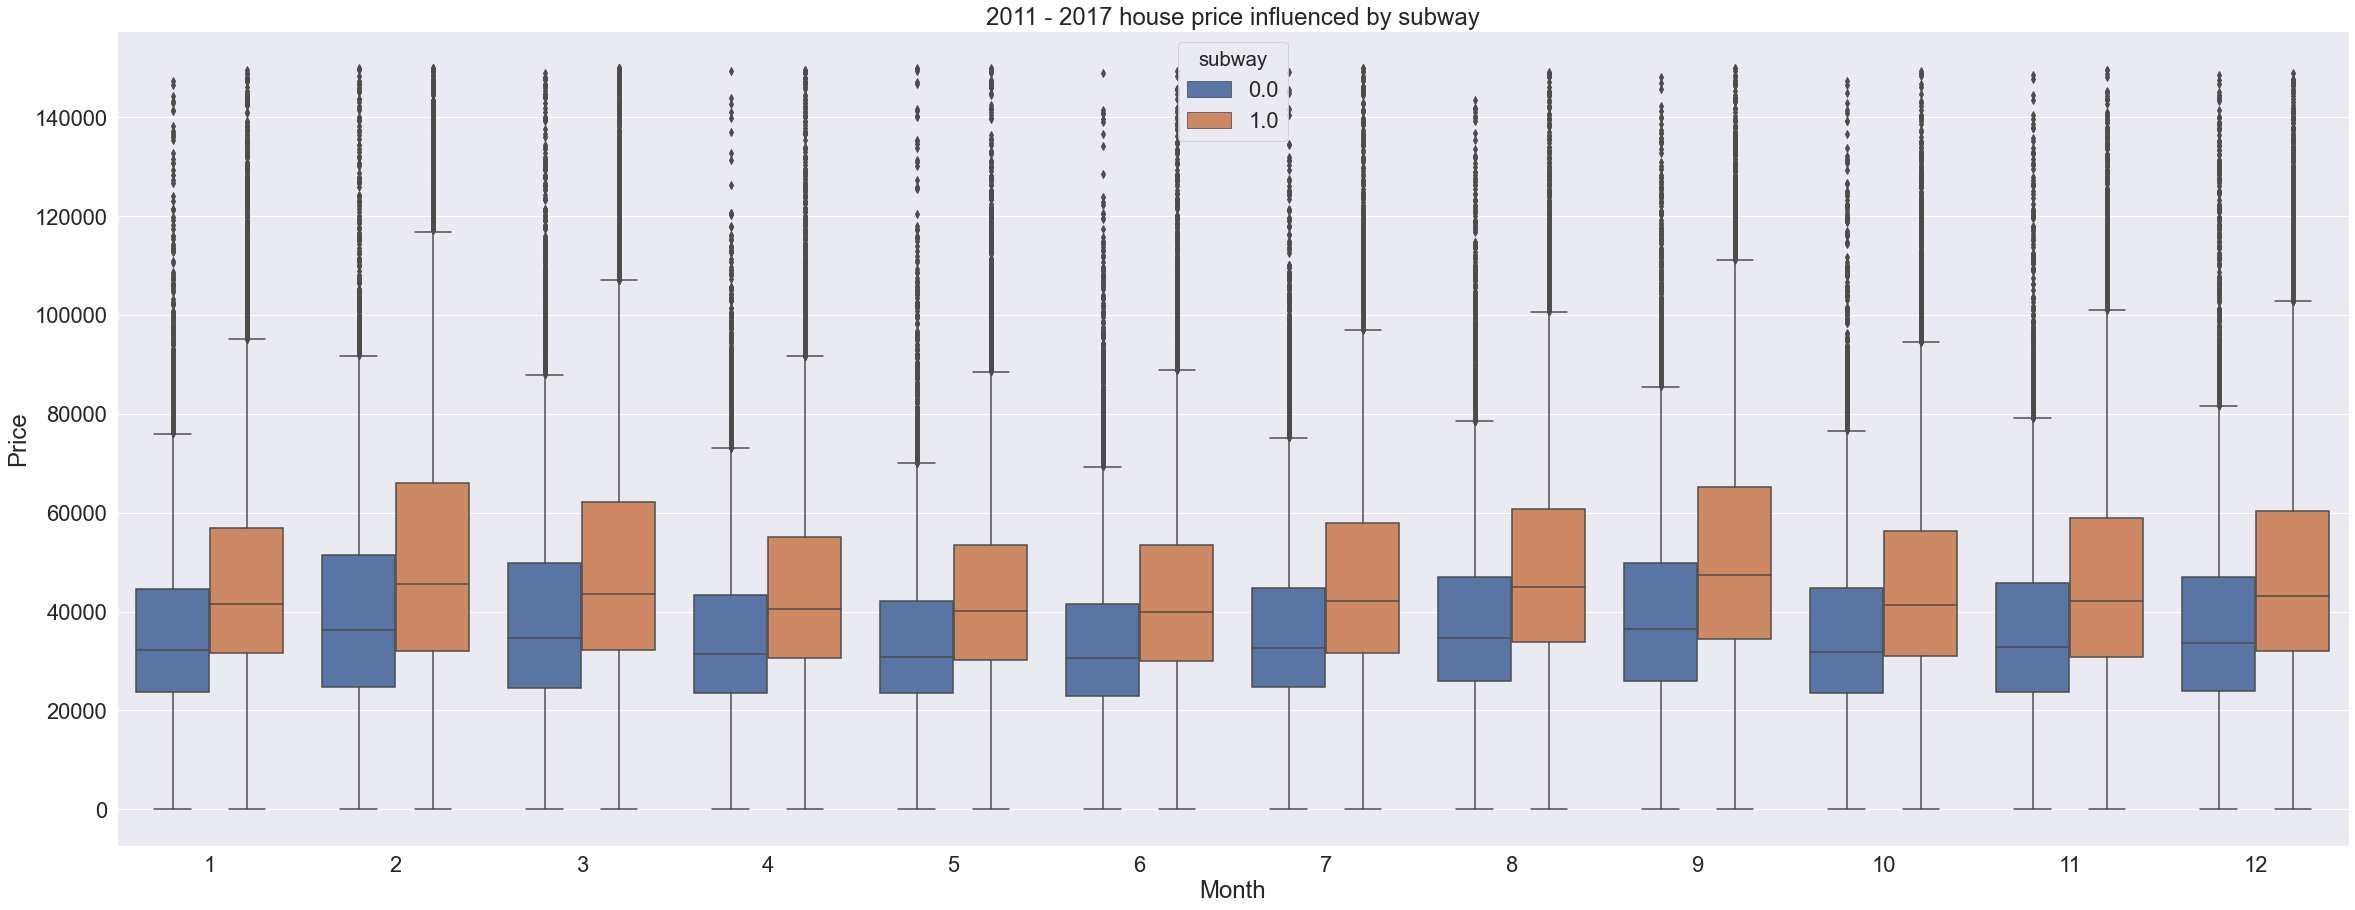

In [8]:
f, ax = plt.subplots(figsize=(40, 15))
sns.boxplot(y='price', x='month', hue='subway', data= house_price)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('2011 - 2017 house price influenced by subway')

From the above plot, it can be easily told that the house/apartment with subway nearby is much higher than those without a subway. The blue box represents house with no subway nearby, and the orange box represents those house with a subway station in 3km distance from the houses. Clearly the median of unit house sale price per square meters with subway is about ￥10,000 higher than those without a subway station.

Also, the distance to subway sation matters also, especially when people renting a house(https://raw.githubusercontent.com/ruobing110/final_projects/master/figures/house_sale_price_with_metro_distance.jpg).

![Subway distance](https://raw.githubusercontent.com/ruobing110/final_projects/master/figures/house_sale_price_with_metro_distance.jpg)

From the plot, if the subway station is more than 3 km farther from the house/apartment, it won't have much influence on the rent.Though ￥100 seems not much, but a 10 $m^2$ apartment room will increase ￥1,000 house rent. As the average salary for monthly salary in Bejing is around ￥ 8000(https://checkinprice.com/average-minimum-salary-beijing-china/),so this increase will make great impact.